# K-Means

El algoritmo k-means es un algoritmo de aprendizaje no supervisado que se enmarca dentro de la familia de los algoritmos de *clustering*. Su objetivo, por tanto, consiste en agrupar datos no etiquetados. Veamos como funciona mediante un ejemplo.

Cargamos la librería `sklearn`:

In [ ]:
import sklearn

Y generamos un conjunto de datos síntetico. Con fines didácticos hemos generado dos clústers y los hemos diferenciados con los colores rojo y azul, pero hay que tener en cuenta que el algoritmo, al ser no supervisado, no conocerá estas etiquetas por lo que trabajará unicamente con las coordenadas de los puntos para determinar los clusters.

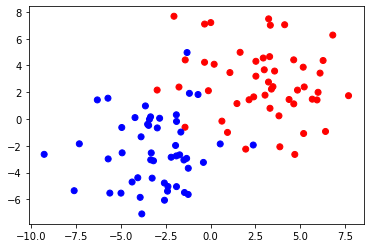

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=[[-3,-3], [3,3]], cluster_std=2.5, random_state=23)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=plt.cm.brg(y/2))

El funcionamiento del algoritmo es muy sencillo:

1.   Se define el número de clúster (*k*) que se quiere construir
2.   Se inicializan *k* centroides con valores aleatorios dentro del rango de los datos. En algunas ocasiones, se eligen al azar *k* muestras del conjunto de datos para inicializar estos centroides.
3.   Se calcula asigna cada muestra del conjunto de datos al centroide más cercano.
4.   Se actualizan los centroides con el valor promedio de todas las muestras que les han sido asignadas.
5.   Se repiten los pasos 3 y 4 hasta que el algoritmo converja.

Podemos ilustrar de forma gráfica este proceso haciendo uso de la implementación del algoritmo [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) de `skearn`. Las siguientes 4 imágenes muestran las 4 primeras iteraciones de una ejecución de k-means para 2 clusters ($k=2$). Como observamos se van desplazando los centroides hacia los centros de las nubes de puntos roja y azul. Volvemos a resaltar que estos colores son únicamente didácticos, el algoritmos no los ha usado para desplazar los clústers.



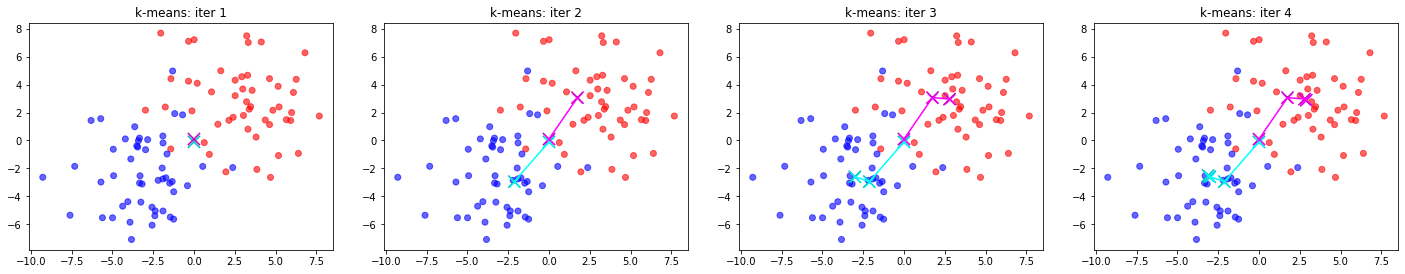

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# initial centroids
centroids=np.array([[0,-0.1], [0,0.1]])

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
fig.tight_layout(pad=2.0)

axs[0].set_title('k-means: iter 1')

axs[0].scatter(X[:,0], X[:,1], c=plt.cm.brg(y/2, alpha=.6))
axs[0].scatter(centroids[:,0], centroids[:,1], color=['c','m'], marker="x", s=150)


for i, iters in enumerate([1,2,3]):
  kmeans = KMeans(n_clusters=2, init=centroids[:2], n_init=1, max_iter=iters, random_state=23)
  kmeans.fit(X)

  centroids = np.concatenate((centroids, kmeans.cluster_centers_))

  axs[i+1].set_title('k-means: iter ' + str(iters+1))

  axs[i+1].scatter(X[:,0], X[:,1], c=plt.cm.brg(y/2, alpha=.6))
  axs[i+1].scatter(centroids[:,0], centroids[:,1], color=['c','m']*(i+2), marker="x", s=150)
  axs[i+1].plot(centroids[::2,0], centroids[::2,1], color='cyan', marker="x", markersize=10)
  axs[i+1].plot(centroids[1::2,0], centroids[1::2,1], color='magenta', marker="x", markersize=10)


Una vez concluido el entranamiento, se definirán dos regiones en todo el espacio de los datos, una para cada clúster. La siguiente imagen muestra estas regiones. La mayoría de datos se habrán agrupado correctamente, aunque, los que estén cerca de la frontera del clúster, tendrán más probabilidad de no agruparse en el clúster adecuado.

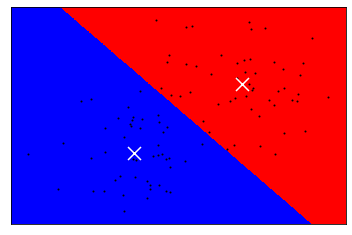

In [ ]:
kmeans = KMeans(n_clusters=2, init=centroids[:2], n_init=1, max_iter=3, random_state=23)
kmeans.fit(X)

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.bwr,
           aspect='auto', origin='lower')

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Visto el funcionamiento del algoritmo podemos afirmar que la clave del mismo radica en la métrica utilizada para determinar la distancia entre dos muestras y, por tanto, asignar el centroide más cercano a cada muestra. Lo más habitual es emplear la distnacia euclidea:

$$
dist(x_i,x_j) = \sqrt{(x_{i,1}-x_{j,1})^2 + (x_{i,2}-x_{j,2})^2 + \dots + (x_{i,m}-x_{j,m})^2} = \sqrt{\sum_{f=1}^m (x_{i,f}-x_{j,f})^2}
$$

No obstante, pueden emplearse otras distancias en caso necesario.

En términos generales, el algoritmo k-means funciona bien. Sin embargo, tiene un gran problema: su enorme coste computacional. Calcular las distancias entre cada punto y los centroides en cada iteración es extramdaemente lento cuando se tiene un conjunto de datos grande.

Para solvertarlo existe una variante llamada **Mini Batch k-Means**, disponible en `sklearn` en la clase [`MiniBatchKMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html) que implementa el algoritmo k-Means con una variante: en lugar calcular el nuevo centroide considerando todas las muestras, lo hace con un subconjunto aleatorio de las mismas. De este modo, el tiempo de procesamiento se acelera y, al mismo tiempo, se reduce el *overfitting*.

<hr>

Creado por **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">